In [3]:
#### importing all the libraries:

import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [4]:
cifar10.data_path = 'data/CIFAR-10/'

In [5]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [8]:
print(images_train.shape)
print(cls_train.shape)
print(labels_train.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)


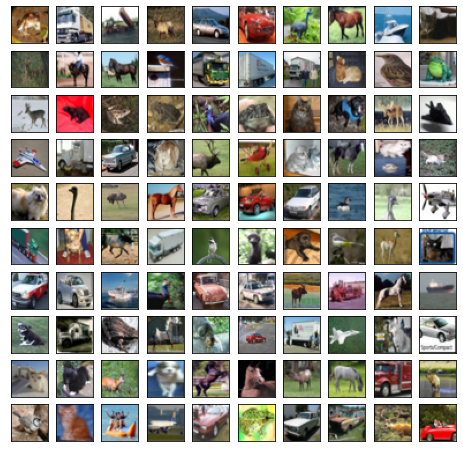

In [9]:
### plotting the original images :

fig = plt.figure(figsize = (8,8))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1, xticks = [], yticks = [])
    ax.imshow(images_train[i])
plt.show()


* In order to feed an image data into a CNN model, the dimension of the input tensor should be either (width x height x num_channel) 

In [10]:
#reshaping the images before fitting
images_train_reshaped = images_train.reshape((50000,32*32*3))
images_train_reshaped.shape

(50000, 3072)

In [11]:
#applying pca and fittin g the reshaped images
pca = PCA()
pca.fit(images_train_reshaped)

PCA()

In [12]:
pca.explained_variance_

array([5.53633226e+01, 2.14265348e+01, 1.27464910e+01, ...,
       1.64690026e-06, 1.60936325e-06, 1.58719044e-06])

In [13]:
#deciding k features to maintain 99% variance
k = 0
current_variance = 0
total = sum(pca.explained_variance_)

while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k += 1
k


658

In [14]:
## fitting the data with new k components:

pca = PCA(n_components = k, whiten = True)
images_train_reshaped = pca.fit_transform(images_train_reshaped)

In [15]:
images_train_reshaped.shape

(50000, 658)

In [16]:
## reversing the process to access the images are intact or not

images_approx = pca.inverse_transform(images_train_reshaped)
images_approx = images_approx.reshape((50000,32,32,3))
images_approx.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

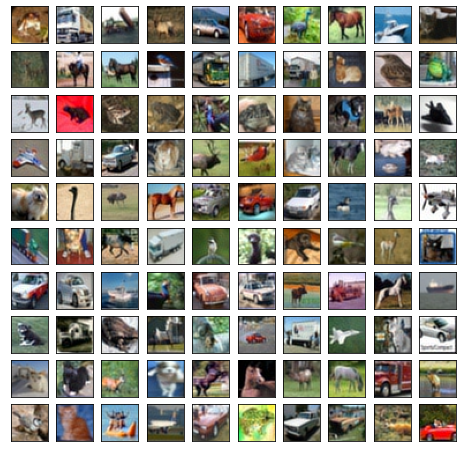

In [17]:
### plotting images after loosing info.

fig = plt.figure(figsize = (8,8))
for i in range(100):
    ax = fig.add_subplot(10,10, i+1, xticks = [], yticks = [])
    ax.imshow(images_approx[i])
plt.show()

##### test data

In [18]:
images_test.shape

(10000, 32, 32, 3)

In [19]:
## resahping the testing data :
images_test_reshaped = images_test.reshape((10000, 32*32*3))
images_test_reshaped.shape

(10000, 3072)

In [20]:
images_test_transformed = pca.transform(images_test_reshaped)
images_test_transformed.shape

(10000, 658)

In [21]:
## Applying Random Forest Classification

rf = RandomForestClassifier()
rf.fit(images_train_reshaped,cls_train)
cls_pred = rf.predict(images_test_transformed)
print(classification_report(cls_test, cls_pred))
print('<--------------------------------------------------------------------------------------------------------------------->')
print(confusion_matrix(cls_test,cls_pred ))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48      1000
           1       0.42      0.51      0.46      1000
           2       0.27      0.24      0.25      1000
           3       0.24      0.22      0.23      1000
           4       0.36      0.36      0.36      1000
           5       0.32      0.30      0.31      1000
           6       0.44      0.44      0.44      1000
           7       0.39      0.30      0.34      1000
           8       0.47      0.56      0.51      1000
           9       0.39      0.40      0.39      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.38      0.38     10000
weighted avg       0.38      0.38      0.38     10000

<--------------------------------------------------------------------------------------------------------------------->
[[498  59  57  34  27  32  24  39 171  59]
 [ 46 508  20  55   9  38  29  42  70 183]
 [134  43 238  86 179  84  95  53  

In [ ]:
#Applying SVM Classification
clf = SVC()
grid={'C':[1e2,1e4,1e1,5e3,1e3,5e2],
      'gamma':[1e-3,1e-2,5e-3,5e-2,1e-4,1e-5]}

svm = GridSearchCV(clf,grid, n_jobs = -1)
svm.fit(images_train_reshaped, cls_train)
print(svm.score(images_test_transformed, cls_test))

In [ ]:
y_pred = svm.predict(images_test_transformed)
print(classification_report(cls_test,y_pred))